In [1]:
import numpy as np
import vectormath as vmath
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


###### import numpy as np
import vectormath as vmath
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

%matplotlib notebook

class Particle :

    def __init__(self, position, velocity, mass, color) :
        self.position = position
        self.velocity = velocity
        self.mass = mass
        self.color = color
        self.time = 0.
        self.xtrail = []
        self.ytrail = []
        self.ztrail = []
        self.ttrail = []
        self.add_to_trail()  
        
    def accelerate(self, force) :
        self.velocity += force / self.mass
        
    def update(self, timestep) :
        self.position += self.velocity * timestep
        self.time += timestep
        self.add_to_trail()  
 
    def add_to_trail(self) :
        self.xtrail.append(self.position.x)
        self.ytrail.append(self.position.y)
        self.ztrail.append(self.position.z)
        self.ttrail.append(self.time)
                
    def gforce(self, other) :
        diff = other.position - self.position
        dist = np.linalg.norm(diff)
        if dist != 0. :    
            return diff/dist * self.mass * other.mass / (dist * dist)
        else :
            return vmath.Vector3(0., 0., 0.)
        
    def readout(self) :
        print("Position ", self.position)
        print("Velocity ", self.velocity)
        print("Mass ", self.mass)
        print("Color ", self.color)
        print("")

def create_universe() :
    universe = [] 
    
    position = vmath.Vector3(-1.2, 1.2, 1.2)
    velocity = vmath.Vector3(5., 5., -6.)
    color    = "red"        

    universe.append(Particle(position, velocity, 0.03, color))

    position = vmath.Vector3(1.2, 1.2, 1.2)
    velocity = vmath.Vector3(5., 5., 5.)
    color    = "green"        

    universe.append(Particle(position, velocity, 0.03, color))
    
    position = vmath.Vector3(0., 1., 2.)
    velocity = vmath.Vector3(-0.33, -0.33, 0.)
    color    = "blue"       

    universe.append(Particle(position, velocity, 1., color))
    
    return universe
    
universe = create_universe()

force = vmath.Vector3(0., 0., 0.)
timestep = 0.01
nsteps = 500

for p in universe :
    p.readout()  
print("-------------------")

def update_universe() :
    for p1 in universe :
        force = [0., 0., 0.]
        for p2 in universe :
            force += p1.gforce(p2)
        p1.accelerate(force)
        p1.update(timestep)

fig = plt.figure()


animate = False

if animate :
        update_universe()
else :
    for i in range(nsteps):
        update_universe()
            
    ax = fig.gca(projection='3d')

    for p in universe :
        ax.plot(p.xtrail, p.ytrail, p.ztrail, lw=0.5, color=p.color)

    plt.draw()

<IPython.core.display.Javascript object>


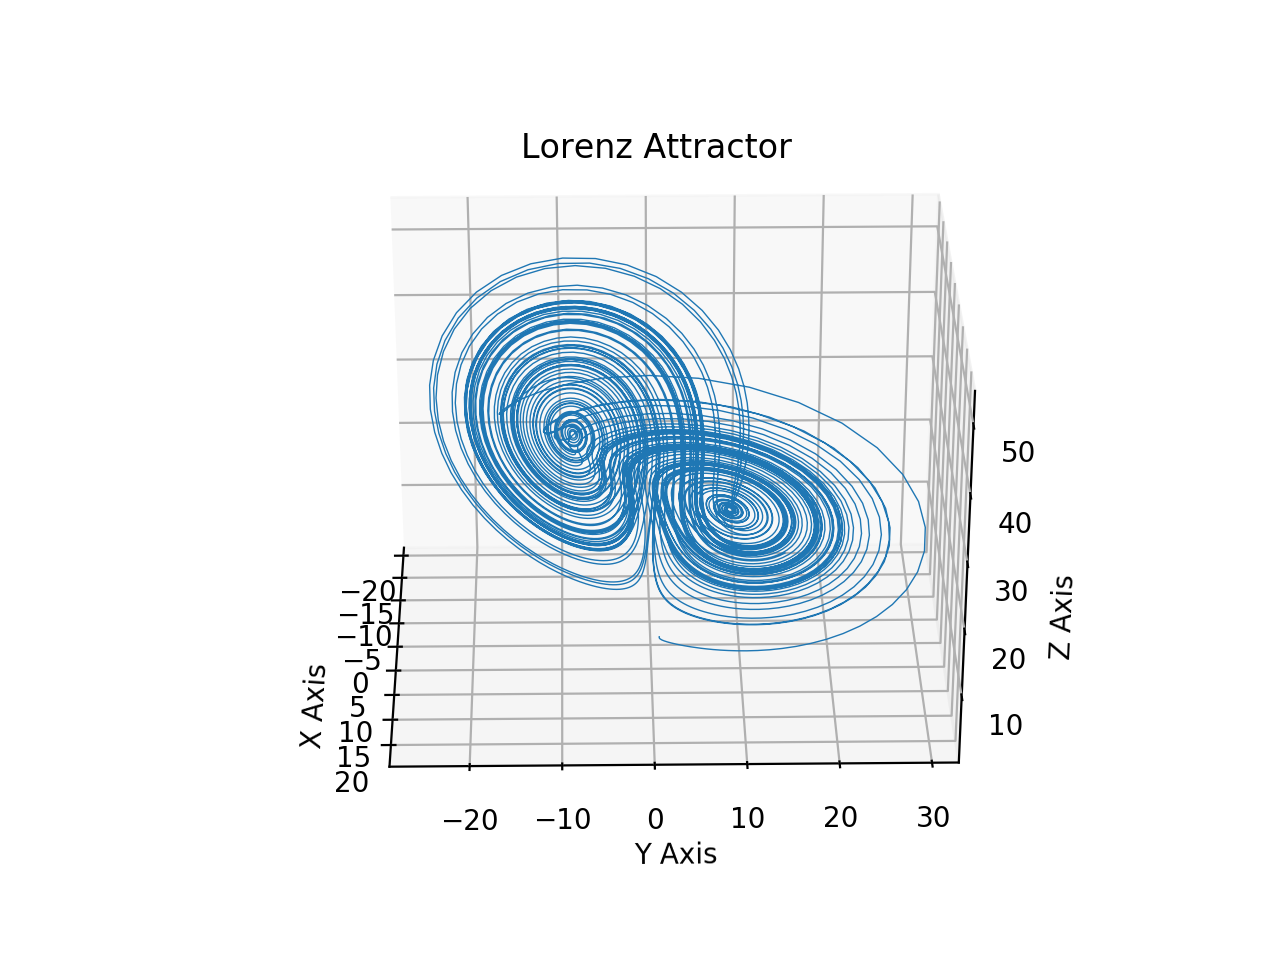

In [112]:
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

%matplotlib notebook

def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
num_steps = 10000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)


# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

<IPython.core.display.Javascript object>


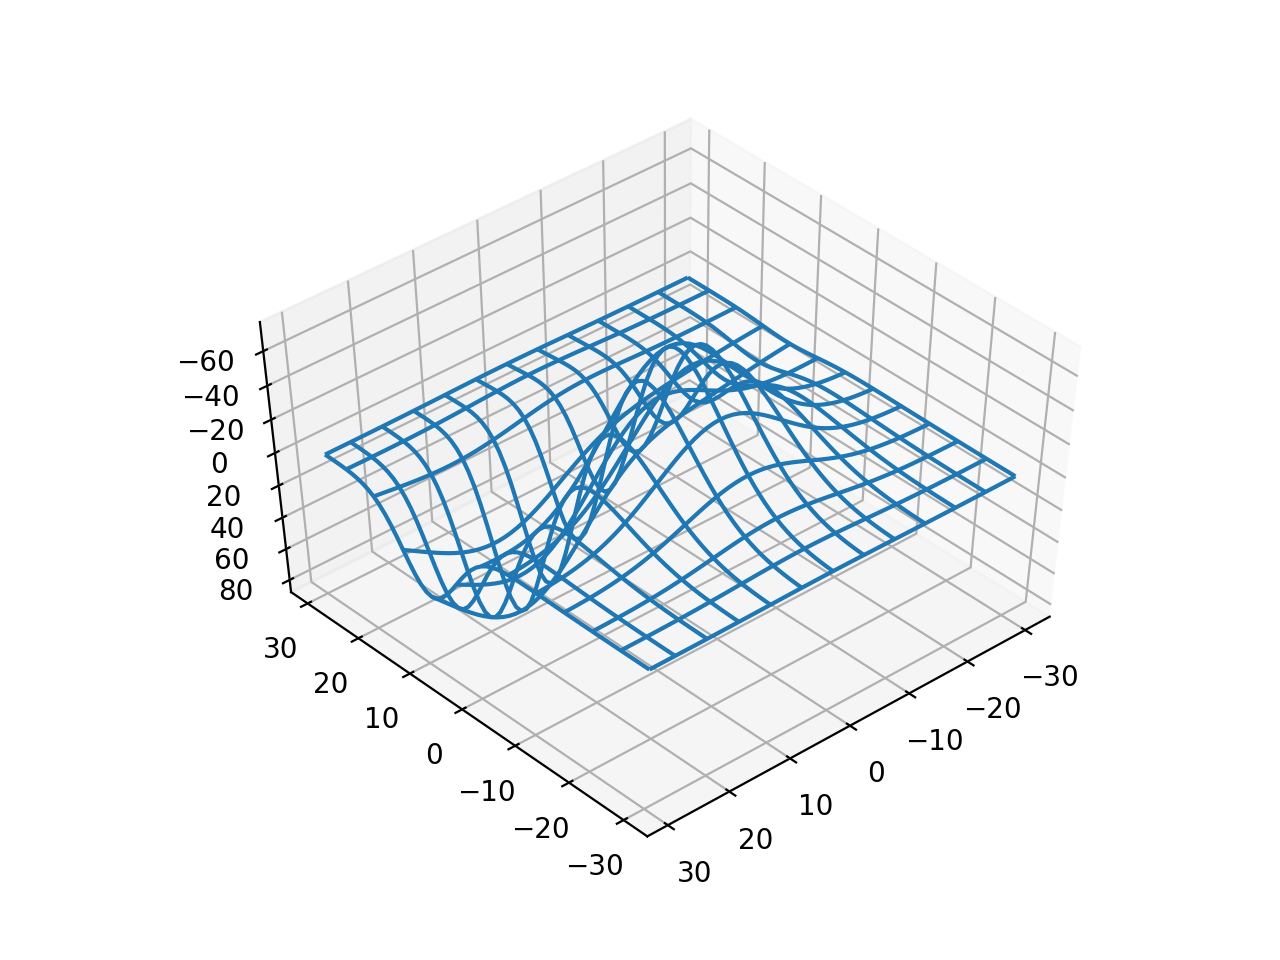

In [96]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

Position  [-1.2  1.2  1.2]
Velocity  [ 5.  5. -6.]
Mass  0.03
Color  red

Position  [1.2 1.2 1.2]
Velocity  [6. 6. 6.]
Mass  0.03
Color  green

Position  [0. 1. 2.]
Velocity  [-0.33 -0.33  0.  ]
Mass  1.0
Color  blue

-------------------


<IPython.core.display.Javascript object>


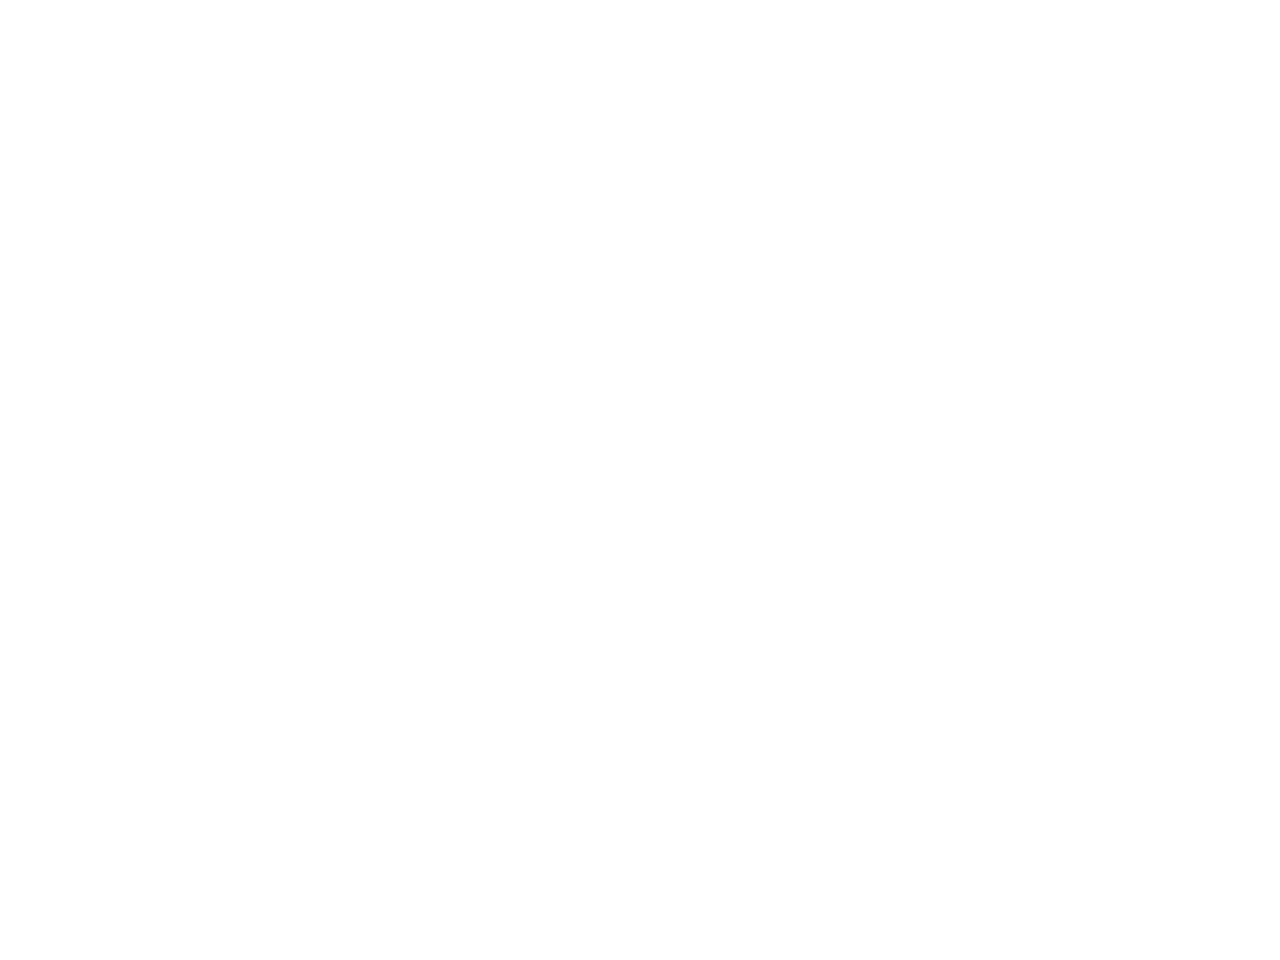

KeyboardInterrupt: 

In [95]:
import numpy as np
import vectormath as vmath
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

%matplotlib notebook

class Particle :

    def __init__(self, position, velocity, mass, color) :
        self.position = position
        self.velocity = velocity
        self.mass = mass
        self.color = color
        self.time = 0.
        self.xtrail = []
        self.ytrail = []
        self.ztrail = []
        self.ttrail = []
        self.add_to_trail()  
        
    def accelerate(self, force) :
        self.velocity += force / self.mass
        
    def update(self, timestep) :
        self.position += self.velocity * timestep
        self.time += timestep
        self.add_to_trail()  
 
    def add_to_trail(self) :
        self.xtrail.append(self.position.x)
        self.ytrail.append(self.position.y)
        self.ztrail.append(self.position.z)
        self.ttrail.append(self.time)
                
    def gforce(self, other) :
        diff = other.position - self.position
        dist = np.linalg.norm(diff)
        if dist != 0. :    
            return diff/dist * self.mass * other.mass / (dist * dist)
        else :
            return vmath.Vector3(0., 0., 0.)
        
    def readout(self) :
        print("Position ", self.position)
        print("Velocity ", self.velocity)
        print("Mass ", self.mass)
        print("Color ", self.color)
        print("")

def create_universe() :
    universe = [] 
    
    position = vmath.Vector3(-1.2, 1.2, 1.2)
    velocity = vmath.Vector3(5., 5., -6.)
    color    = "red"        

    universe.append(Particle(position, velocity, 0.03, color))

    position = vmath.Vector3(1.2, 1.2, 1.2)
    velocity = vmath.Vector3(6., 6., 6.)
    color    = "green"        

    universe.append(Particle(position, velocity, 0.03, color))
    
    position = vmath.Vector3(0., 1., 2.)
    velocity = vmath.Vector3(-0.33, -0.33, 0.)
    color    = "blue"       

    universe.append(Particle(position, velocity, 1., color))
    
    return universe
    
universe = create_universe()

force = vmath.Vector3(0., 0., 0.)
timestep = 0.01
nsteps = 3600

for p in universe :
    p.readout()  
print("-------------------")
        
fig = plt.figure()
ax = fig.gca(projection='3d')

for p in universe :
    ax.plot(p.xtrail, p.ytrail, p.ztrail, lw=0.5, color=p.color)
    
# rotate the axes and update
for angle in range(0, 3600):
    for p1 in universe :
        force = [0., 0., 0.]
        for p2 in universe :
            force += p1.gforce(p2)
        p1.accelerate(force)
        p1.update(timestep)
        
    ax = fig.gca(projection='3d')

    for p in universe :
        ax.plot(p.xtrail, p.ytrail, p.ztrail, lw=0.5, color=p.color)

    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.01)

In [103]:
import numpy as np
import vectormath as vmath
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

samples = 50 # of samples in both x and y 
norm = vmath.Vector3()
eye = vmath.Vector3( 0., 0., 1. )
crosseye = vmath.Vector3()
suncross = vmath.Vector3()
sun = vmath.Vector3()
planet = np.ndarray((samples,samples))
rough = 0.3


# Base 10 logarithm
def log10( x ) :
    return np.log(x)/np.log(10.)

# normalized astronomical magnitude
def magnitude( x, norm=1.) :
    return -log10(x/norm)*2.5

def brdf( costhi, costhr, cosphi, a, b):   # Bidirectional Reflectance Distribution Function
    if(cosphi>0.):
        if costhi > costhr :
            sina = np.sqrt(1.0 - costhr**2)
            tanb = np.sqrt(1.0 - costhi**2)/costhi
        else :
            sina = np.sqrt(1.0 - costhi**2)
            tanb = np.sqrt(1.0 - costhr**2)/costhr
        return costhi*(a + b*cosphi*sina*tanb)
    else:
        return costhi*a

def brightness(phase, rough = 0.3, render=True):
    bright = 0.
    sun.x = np.sin(phase*np.pi/180.) # vector pointing to sun
    sun.y = 0.
    sun.z = np.cos(phase*np.pi/180.)
    a = 1. - 0.5*(rough**2./(rough**2.+0.33)) # a,b for Oren-Nayar - constant over loop
    b = 0.45*(rough**2./(rough**2.+0.09))
    # Trace parallel rays towards a sphere
    for xsamp in range (0, samples):
        for ysamp in range (0, samples):
            norm.x = xsamp*2./(samples-1.)-1.
            norm.y =  ysamp*2./(samples-1.0)-1.
            norm.z = 0.
            mag = norm.length
            # Check if ray intersects sphere
            if mag <= 1.0:
                norm.z = np.sqrt(1.0 - mag**2.)
                costhi = norm.dot(sun)
                #calculate sun and eye vectors projected perpendicular to normal
                if  costhi >= 0.:
                    sunproj = sun - costhi*norm
                    sunproj.normalize()
                    eyeproj = eye - norm.dot(eye)*norm
                    eyeproj.normalize
                    cosphi = sunproj.dot(eyeproj)  
                    planet[ysamp][xsamp] = brdf(costhi,norm.z,cosphi,a,b)
                else:
                    planet[ysamp][xsamp] = 0.
            else:
                planet[ysamp][xsamp] = 0.
            bright += planet[ysamp][xsamp]
            
    if render:
        im = plt.imshow(planet)
        plt.show()
        
    return bright

def plotcurve(planet,col,rough) :
    phasecurve = np.ndarray(175)

    # brightness(drawphase, rough, True) #draw the sample change
    
    for phase in range (0, 175):
        phasecurve[phase] = brightness(phase, rough, False)
        if phase == 0 :
            fudge = phasecurve[phase]
        phasecurve[phase] = magnitude(phasecurve[phase],fudge)
   
    im = plt.plot(phasecurve,color=col)
    plt.ylim(10,-2)
    plt.xlabel('Phase Angle')
    plt.ylabel('Normalized Magnitude')
        
plotcurve("Mercury","black",1.0)
plotcurve("Moon","gray",0.0)
plt.show()
interact(brightness, phase=(0., 180., 1.), rough=(0., 1., 0.01));

TypeError: plot() missing 1 required positional argument: 'ys'

Position  [-1.2  1.2  1.2]
Velocity  [ 5.  5. -5.]
Mass  0.04
Color  red

Position  [1.2 1.2 1.2]
Velocity  [5. 5. 5.]
Mass  0.03
Color  green

Position  [0. 1. 2.]
Velocity  [-0.4 -0.4  0. ]
Mass  1.0
Color  blue

-------------------


<IPython.core.display.Javascript object>


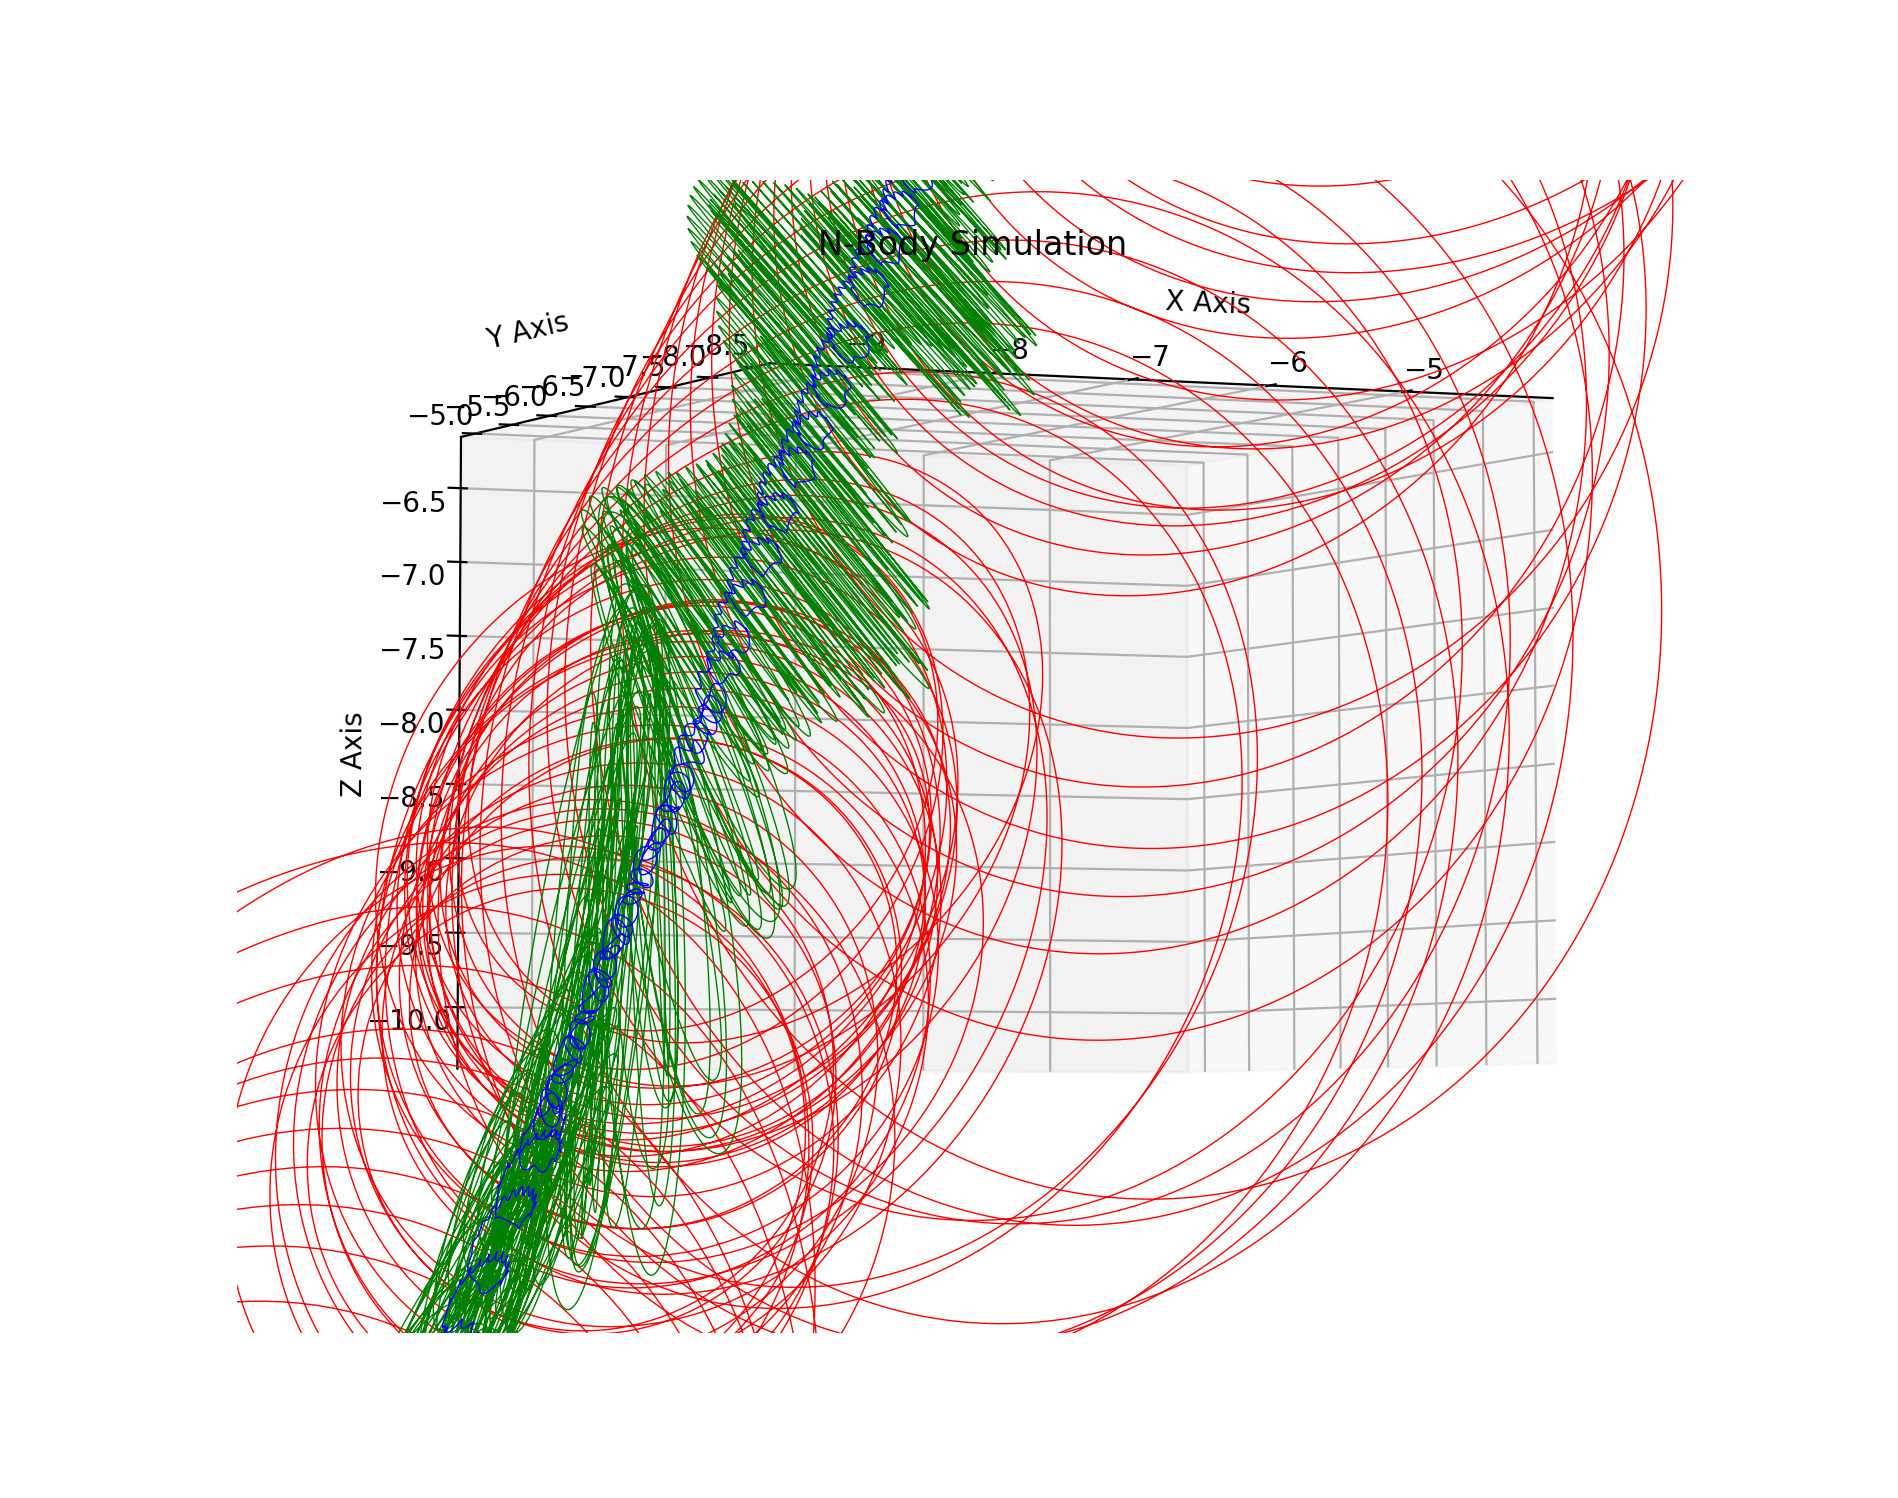

interactive(children=(IntSlider(value=32000, description='frame', max=64000), Output()), _dom_classes=('widget…

In [164]:
import numpy as np

import vectormath as vmath 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 

from mpl_toolkits.mplot3d import Axes3D # noqa: F401 unused import

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib notebook

class Particle :

    def __init__(self, position, velocity, mass, color) :
        self.position = position
        self.velocity = velocity
        self.mass = mass
        self.color = color
        self.time = 0.
        self.xtrail = []
        self.ytrail = []
        self.ztrail = []
        self.ttrail = []
        self.add_to_trail()  

    def accelerate(self, force) :
        self.velocity += force / self.mass

    def update(self, timestep) :
        self.position += self.velocity * timestep
        self.time += timestep
        self.add_to_trail()  

    def add_to_trail(self) :
        self.xtrail.append(self.position.x)
        self.ytrail.append(self.position.y)
        self.ztrail.append(self.position.z)
        self.ttrail.append(self.time)

    def gforce(self, other) :
        diff = other.position - self.position
        dist = np.linalg.norm(diff)
        if dist != 0. :    
            return diff/dist * self.mass * other.mass / (dist * dist)
        else :
            return vmath.Vector3(0., 0., 0.)

    def readout(self) :
        print("Position ", self.position)
        print("Velocity ", self.velocity)
        print("Mass ", self.mass)
        print("Color ", self.color)
        print("")

def create_universe() : 
    universe = []

    position = vmath.Vector3(-1.2, 1.2, 1.2)
    velocity = vmath.Vector3(5., 5., -5.)
    color    = "red"        

    universe.append(Particle(position, velocity, 0.04, color))

    position = vmath.Vector3(1.2, 1.2, 1.2)
    velocity = vmath.Vector3(5., 5., 5.)
    color    = "green"        

    universe.append(Particle(position, velocity, 0.03, color))

    position = vmath.Vector3(0., 1., 2.)
    velocity = vmath.Vector3(-0.4, -0.4, 0.)
    color    = "blue"       

    universe.append(Particle(position, velocity, 1., color))

    return universe

universe = create_universe()

force = vmath.Vector3(0., 0., 0.) 
timestep = 0.01 
nsteps = 64000

for p in universe : 
    p.readout()
print("-------------------")

def update_universe() : 
    for p1 in universe : 
        force = [0., 0., 0.] 
        for p2 in universe : 
            force += p1.gforce(p2) 
        p1.accelerate(force) 
    for p in universe :
        p.update(timestep)

fig = plt.figure()
ax = fig.gca(projection='3d')

        
for i in range(nsteps) : 
    update_universe()

def update_animation(frame) :
    ax.clear()
    print("update frame", frame)
    
    for p in universe :
        ax.plot(p.xtrail[0:frame], p.ytrail[0:frame], p.ztrail[0:frame], lw=0.5, color=p.color)
        ax.plot([p.xtrail[frame]], [p.ytrail[frame]], [p.ztrail[frame]], 'o', color=p.color)
        
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title("N-Body Simulation")

interact(update_animation, frame=(0, nsteps, 1));
